# **Project - Classification and Hypothesis Testing: Hotel Booking Cancellation Prediction**

## **Marks: 40**

---------------
## **Problem Statement**

### **Context**

**A significant number of hotel bookings are called off due to cancellations or no-shows.** Typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost. This may be beneficial to hotel guests, but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

This pattern of cancellations of bookings impacts a hotel on various fronts:
1. **Loss of resources (revenue)** when the hotel cannot resell the room.
2. **Additional costs of distribution channels** by increasing commissions or paying for publicity to help sell these rooms.
3. **Lowering prices last minute**, so the hotel can resell a room, resulting in reducing the profit margin.
4. **Human resources to make arrangements** for the guests.

### **Objective**

This increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal - they are facing problems with this high number of booking cancellations and have reached out to your firm for data-driven solutions. You, as a Data Scientist, have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.


### **Data Description**

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below:


**Data Dictionary**

* **Booking_ID:** Unique identifier of each booking
* **no_of_adults:** Number of adults
* **no_of_children:** Number of children
* **no_of_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* **no_of_week_nights:** Number of weekday nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* **type_of_meal_plan:** Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* **required_car_parking_space:** Does the customer require a car parking space? (0 - No, 1- Yes)
* **room_type_reserved:** Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* **lead_time:** Number of days between the date of booking and the arrival date
* **arrival_year:** Year of arrival date
* **arrival_month:** Month of arrival date
* **arrival_date:** Date of the month
* **market_segment_type:** Market segment designation.
* **repeated_guest:** Is the customer a repeated guest? (0 - No, 1- Yes)
* **no_of_previous_cancellations:** Number of previous bookings that were canceled by the customer prior to the current booking
* **no_of_previous_bookings_not_canceled:** Number of previous bookings not canceled by the customer prior to the current booking
* **avg_price_per_room:** Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* **no_of_special_requests:** Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* **booking_status:** Flag indicating if the booking was canceled or not.

In [4]:
#from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.linear_nodel import LogisiticRegression
#from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier
#from sklearn import tree
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.preprocessing import MinMaxScaler, LabelEncoder,OneHotEncoder
#from sklear.metrics import confusion_matrix,classification_report,roc_auc_score, plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer

## **Importing the libraries required**

In [5]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

## **Loading the dataset**

In [6]:
hotel = pd.read_csv("C:/Users/okwuo/Desktop/DSL/Inn project/INNHotelsGroup.csv")

In [7]:
# Copying data to another variable to avoid any changes to original data
data = hotel.copy()

## **Overview of the dataset**

### **View the first and last 5 rows of the dataset**

Let's **view the first few rows and last few rows** of the dataset in order to understand its structure a little better.

We will use the head() and tail() methods from Pandas to do this.

In [8]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [9]:
data["type_of_meal_plan"].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [10]:
data["market_segment_type"].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [11]:
data["room_type_reserved"].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [12]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


### **Understand the shape of the dataset**

In [13]:
data.shape

(36275, 19)

* The dataset has 36275 rows and 19 columns. 

### **Check the data types of the columns for the dataset**

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* `Booking_ID`, `type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, and `booking_status` are of object type while rest columns are numeric in nature.

* There are no null values in the dataset.

### **Dropping duplicate values**

In [15]:
# checking for duplicate values
data.duplicated().sum()

0

- There are **no duplicate values** in the data.

### **Dropping the unique values column**

**Let's drop the Booking_ID column first before we proceed forward**, as a column with unique values will have almost no predictive power for the Machine Learning problem at hand.

In [16]:
data = data.drop(["Booking_ID"], axis=1)

In [17]:

data=data.drop(["Booking_ID"], axis=1)

KeyError: "['Booking_ID'] not found in axis"

In [ ]:
data.head()

### **Question 1: Check the summary statistics of the dataset and write your observations (2 Marks)**



**Let's check the statistical summary of the data.**

In [ ]:
data.describe()

To envisage the statistial summary for the first column, the distribution will assume a right-skewed and hence; pointing out that the mean is less than the median. In general, it is needs more disecting to fully understand the statistical nature of the dataset.



## **Exploratory Data Analysis**

### **Question 2: Univariate Analysis**

Let's explore these variables in some more depth by observing their distributions.

We will first define a **hist_box() function** that provides both a boxplot and a histogram in the same visual, with which we can perform univariate analysis on the columns of this dataset.

In [ ]:
# Defining the hist_box() function
def hist_box(data,col):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12,6))
  # Adding a graph in each part
  sns.boxplot(data[col], ax=ax_box, showmeans=True)
  sns.distplot(data[col], ax=ax_hist)
  plt.show()

#### **Question 2.1:  Plot the histogram and box plot for the variable `Lead Time` using the hist_box function provided and write your insights. (1 Mark)**

In [ ]:
hist_box(data,"lead_time")

For this portion of the continuous data, it appears to be left-skewed with gradual progression in density decrease as lead_time increases.

#### **Question 2.2:  Plot the histogram and box plot for the variable `Average Price per Room` using the hist_box function provided and write your insights. (1 Mark)**

In [ ]:
hist_box(data, "avg_price_per_room")

The dataset visulizes an approximately normal distribution. 

**Interestingly some rooms have a price equal to 0. Let's check them.**

In [18]:
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


- There are quite a few hotel rooms which have a price equal to 0.
- In the market segment column, it looks like many values are complementary.

In [19]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

* It makes sense that most values with room prices equal to 0 are the rooms given as complimentary service from the hotel.
* The rooms booked online must be a part of some promotional campaign done by the hotel.

In [20]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [21]:
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

#### **Let's understand the distribution of the categorical variables**

**Number of Children**

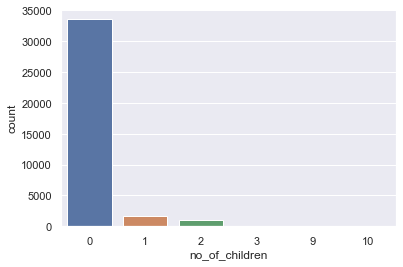

In [36]:
sns.countplot(data['no_of_children'])
plt.show()

In [37]:
data['no_of_children'].value_counts(normalize=True)

0     0.925624
1     0.044604
2     0.029166
3     0.000524
9     0.000055
10    0.000028
Name: no_of_children, dtype: float64

* Customers were not travelling with children in 93% of cases.
* There are some values in the data where the number of children is 9 or 10, which is highly unlikely. 
* We will replace these values with the maximum value of 3 children.

In [38]:
# to replace 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

**Arrival Month**

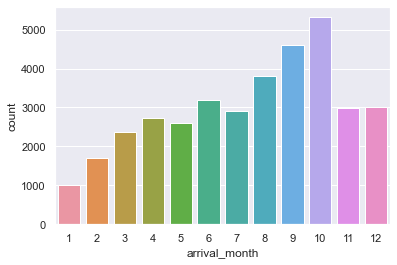

In [39]:
sns.countplot(data["arrival_month"])
plt.show()

In [40]:
data['arrival_month'].value_counts(normalize=True)

10    0.146575
9     0.127112
8     0.105114
6     0.088298
12    0.083280
11    0.082150
7     0.080496
4     0.075424
5     0.071620
3     0.065003
2     0.046975
1     0.027953
Name: arrival_month, dtype: float64

* October is the busiest month for hotel arrivals followed by September and August. **Over 35% of all bookings**, as we see in the above table, were for one of these three months.
* Around 14.7% of the bookings were made for an October arrival.

**Booking Status**

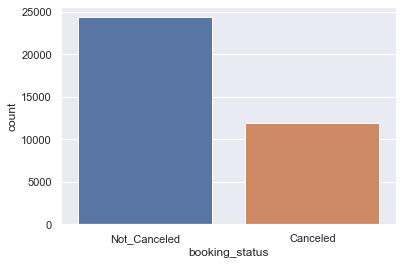

In [41]:
sns.countplot(data["booking_status"])
plt.show()

In [42]:
data['booking_status'].value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

In [43]:
data.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.019776,0.103316,0.105622,0.011429,0.097287,0.076719,0.021841,0.026338,-0.192277,-0.047426,-0.119166,0.297417,0.189401
no_of_children,-0.019776,1.000000,0.029384,0.024490,0.035174,-0.047031,0.048476,-0.002546,0.026544,-0.036869,-0.016637,-0.021502,0.346042,0.126897
no_of_weekend_nights,0.103316,0.029384,1.000000,0.179577,-0.031111,0.046595,0.055357,-0.009894,0.027304,-0.067107,-0.020690,-0.026312,-0.004270,0.060593
no_of_week_nights,0.105622,0.024490,0.179577,1.000000,-0.048784,0.149650,0.032672,0.037376,-0.009305,-0.099764,-0.030080,-0.049344,0.023042,0.045994
required_car_parking_space,0.011429,0.035174,-0.031111,-0.048784,1.000000,-0.066445,0.015684,-0.015505,-0.000037,0.110909,0.027106,0.063810,0.061482,0.087922
lead_time,0.097287,-0.047031,0.046595,0.149650,-0.066445,1.000000,0.143439,0.136814,0.006479,-0.135984,-0.045723,-0.078137,-0.062560,-0.101645
arrival_year,0.076719,0.048476,0.055357,0.032672,0.015684,0.143439,1.000000,-0.339689,0.018849,-0.018175,0.003919,0.026422,0.178843,0.053205
arrival_month,0.021841,-0.002546,-0.009894,0.037376,-0.015505,0.136814,-0.339689,1.000000,-0.042780,0.000341,-0.038615,-0.010718,0.054945,0.110552
arrival_date,0.026338,0.026544,0.027304,-0.009305,-0.000037,0.006479,0.018849,-0.042780,1.000000,-0.015949,-0.012542,-0.001498,0.017630,0.018352
repeated_guest,-0.192277,-0.036869,-0.067107,-0.099764,0.110909,-0.135984,-0.018175,0.000341,-0.015949,1.000000,0.390810,0.539156,-0.175217,-0.011820


* 32.8% of the bookings were canceled by the customers.

**Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis**

In [44]:
#the set of follwing pair of codes is to assertain that the modification has no or minimal derailment on the dataset
#dg.corr()

In [45]:
#plt.figure(figsize=(12,7))
#sns.heatmap(dg.corr(), annot=True)
#plt.show()

In [46]:
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

### **Question 3: Bivariate Analysis**

#### **Question 3.1: Find and visualize the correlation matrix using a heatmap and write your observations from the plot. (2 Marks)**



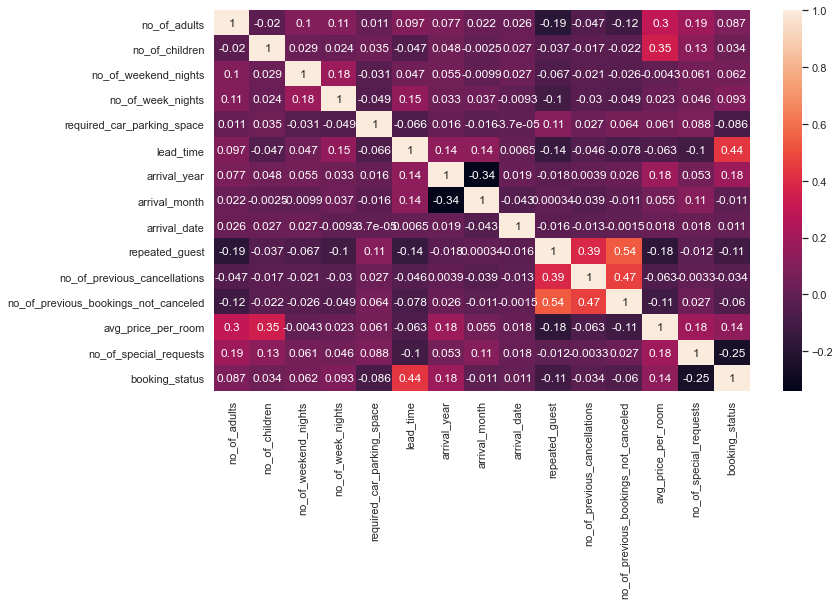

In [47]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot=True)
plt.show()

This states that repeated_guests and no_of_prrevious_bookings_not_canceled are most positively correlated. Going in-depth one might find out cancellation decreases with increase in hotel revisits helping to minimize revenue loss. no_of_special_guests and booking_status have the strongest negative correlation.


**Hotel rates are dynamic and change according to demand and customer demographics. Let's see how prices vary across different market segments**

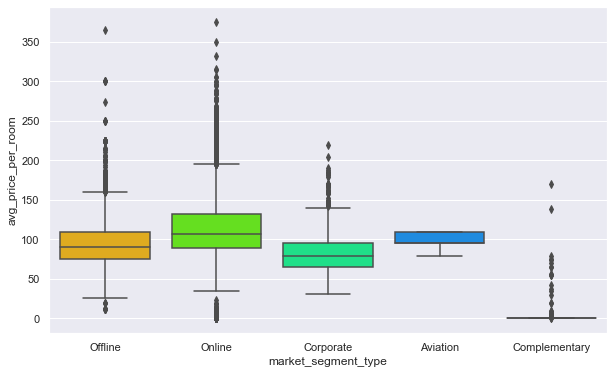

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

* Rooms booked online have high variations in prices.
* The offline and corporate room prices are almost similar.
* Complementary market segment gets the rooms at very low prices, which makes sense.

We will define a **stacked barplot()** function to help analyse how the target variable varies across predictor categories.

In [49]:
# Defining the stacked_barplot() function
def stacked_barplot(data,predictor,target,figsize=(10,6)):
  (pd.crosstab(data[predictor],data[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
  plt.legend(loc="lower right")
  plt.ylabel('Percentage Cancellations %')

#### **Question 3.2: Plot the stacked barplot for the variable `Market Segment Type` against the target variable `Booking Status` using the stacked_barplot  function provided and write your insights. (1 Mark)**

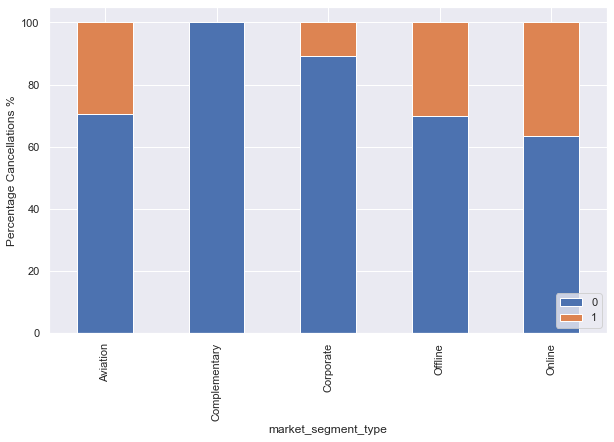

In [50]:
# making a stacked_plot for some variables
stacked_barplot(data, "market_segment_type","booking_status", figsize=(10,6))

Nullifying the uniformity of the Complementary market segment; Corporate had the least probality of cancellation. Seconded by offline and Aviation which tend to be identical, this might be a factor of price and in-person reservation. Overall, most cancellations were via Online reservations. This states that averagedly the probability of cancellation and loss is below 0.5. Online gained or lost; none is yet to certainly decipher but this remains a matter of rigidity of a sinusoidal state. Linearly; Complementary remains complementary over the years, that is to say relevant or not depending on the marketer´s choice. 



#### **Question 3.3: Plot the stacked barplot for the variable `Repeated Guest` against the target variable `Booking Status` using the stacked_barplot  function provided and write your insights. (1 Mark)**

Repeating guests are the guests who stay in the hotel often and are important to brand equity.

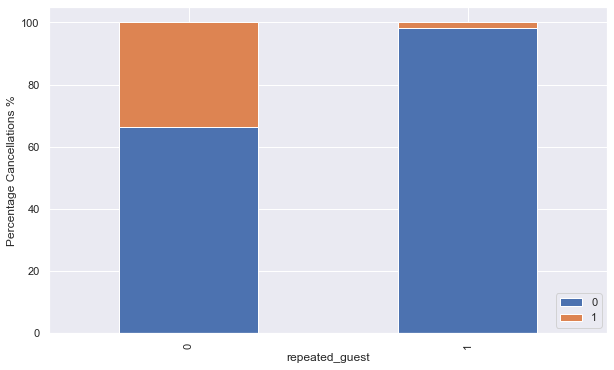

In [51]:
stacked_barplot(data,"repeated_guest", "booking_status",figsize=(10,6))

Non-repeated guests have a higher chance of cancellation whereas repeated guest make fewer cancellations. 


**Let's analyze the customer who stayed for at least a day at the hotel.**

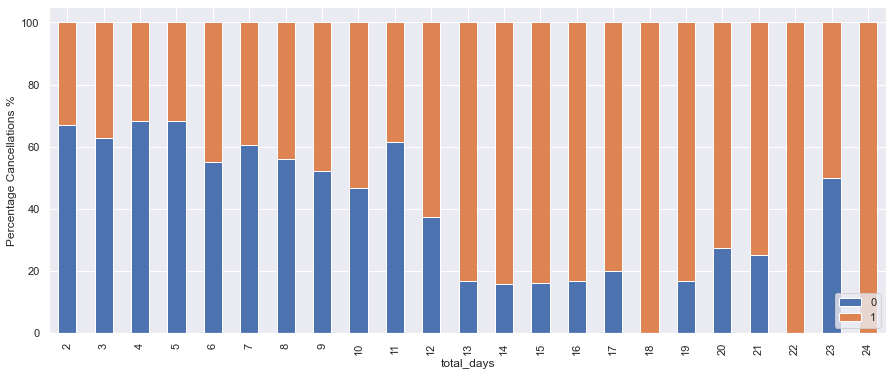

In [52]:
stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stay_data["total_days"] = (stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"])

stacked_barplot(stay_data, "total_days", "booking_status",figsize=(15,6))

* The general trend is that the chances of cancellation were higher for days on the second half of the range of days booked, customers with fewer booked days cancelled lesser than those with days on the second half of the range. Generally the percentages remain fluctuating.

**As hotel room prices are dynamic, Let's see how the prices vary across different months**

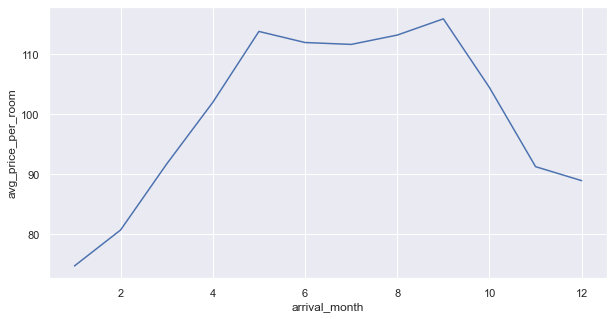

In [53]:
plt.figure(figsize=(10, 5))
sns.lineplot(y=data["avg_price_per_room"], x=data["arrival_month"], ci=None)
plt.show()

* The price of rooms is highest in May to September - around 115 euros per room.

## **Data Preparation for Modeling**

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

**Separating the independent variables (X) and the dependent variable (Y)**

In [54]:
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,0
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,1
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,0
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,1


In [55]:
market_dummies=pd.get_dummies(data["market_segment_type"])
room_dummies=pd.get_dummies(data["room_type_reserved"])
latest=pd.concat([data,market_dummies,room_dummies], axis=1)
new_data=latest.drop(["type_of_meal_plan","room_type_reserved","market_segment_type"], axis=1)
new_data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'Aviation', 'Complementary', 'Corporate', 'Offline', 'Online',
       'Room_Type 1', 'Room_Type 2', 'Room_Type 3', 'Room_Type 4',
       'Room_Type 5', 'Room_Type 6', 'Room_Type 7'],
      dtype='object')

In [56]:
X = new_data[["no_of_weekend_nights","lead_time","arrival_year","no_of_special_requests","Complementary","no_of_week_nights","repeated_guest","no_of_previous_cancellations","arrival_month","no_of_adults","Aviation","no_of_previous_bookings_not_canceled"]]
Y = new_data["booking_status"]

#X = pd.get_dummies(X, drop_first=True) # Encoding the Categorical features

In [57]:
X

,no_of_weekend_nights,lead_time,arrival_year,no_of_special_requests,Complementary,no_of_week_nights,repeated_guest,no_of_previous_cancellations,arrival_month,no_of_adults,Aviation,no_of_previous_bookings_not_canceled
0,1,224,2017,0,0,2,0,0,10,2,0,0
1,2,5,2018,1,0,3,0,0,11,2,0,0
2,2,1,2018,0,0,1,0,0,2,1,0,0
3,0,211,2018,0,0,2,0,0,5,2,0,0
4,1,48,2018,0,0,1,0,0,4,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
36270,2,85,2018,1,0,6,0,0,8,3,0,0
36271,1,228,2018,2,0,3,0,0,10,2,0,0
36272,2,148,2018,2,0,6,0,0,7,2,0,0
36273,0,63,2018,0,0,3,0,0,4,2,0,0


In [135]:
#s = pd.get_dummies(X, drop_first=True) # Encoding the Categorical features
#d = pd.get_dummies(Y, drop_first=True) # Encoding the Categorical features
"""It is now becoming evident that the more we fine-tune the data so as to create a linear model we tend to loss information and variations in the dataset hence making all details plain(i.e generally one-dimensional in a two-dimensional state),
this is to say that not every dataset fits with linear regression"""

'It is now becoming evident that the more we fine-tune the data so as to create a linear model we tend to loss information and variations in the dataset hence making all details plain(i.e generally one-dimensional in a two-dimensional state),\nthis is to say that not every dataset fits with linear regression'

In [59]:
X.shape

(36275, 12)

In [60]:
data.shape

(36275, 18)

In [61]:
X.columns

Index(['no_of_weekend_nights', 'lead_time', 'arrival_year',
       'no_of_special_requests', 'Complementary', 'no_of_week_nights',
       'repeated_guest', 'no_of_previous_cancellations', 'arrival_month',
       'no_of_adults', 'Aviation', 'no_of_previous_bookings_not_canceled'],
      dtype='object')

**Splitting the data into a 70% train and 30% test set**

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [62]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,stratify=Y, random_state=1)

In [63]:
print("Shape of Training set : ", y_train.shape)
print("Shape of test set : ", y_test.shape)

Shape of Training set :  (25392,)
Shape of test set :  (10883,)


In [64]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 12)
Shape of test set :  (10883, 12)
Percentage of classes in training set:
0    0.672377
1    0.327623
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.672333
1    0.327667
Name: booking_status, dtype: float64


## **Model Evaluation Criterion**

#### **Model can make wrong predictions as:**

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

#### **Which case is more important?** 

Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage brand equity. 



#### **How to reduce the losses?**

* The hotel would want the `F1 Score` to be maximized, the greater the F1  score, the higher the chances of minimizing False Negatives and False Positives. 

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [65]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Cancelled', 'Cancelled'], yticklabels=['Not Cancelled', 'Cancelled'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## **Building the model**

We will be building 4 different models:

- **Logistic Regression**
- **Support Vector Machine (SVM)**
- **Decision Tree**
- **Random Forest**

### **Question 4: Logistic Regression (6 Marks)**

#### **Question 4.1: Build a Logistic Regression model (Use the sklearn library) (1 Mark)**

In [66]:
#there are two many modifications and errors raised in the process of cleaning this dataset and getting it fit for fitting, with the initial analog analysis one can efficiently make short-term predictions whether accurate, in-accurate or partially/close-to-accurate

In [67]:
# with these hitches, it is evident that linear regression is faster and easier to model and functions best with numerical variables.

In [68]:
# Fitting logistic regression model
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

#### **Question 4.2: Check the performance of the model on train and test data (2 Marks)**

              precision    recall  f1-score   support

           0       0.78      0.89      0.83     17073
           1       0.68      0.47      0.55      8319

    accuracy                           0.75     25392
   macro avg       0.73      0.68      0.69     25392
weighted avg       0.74      0.75      0.74     25392



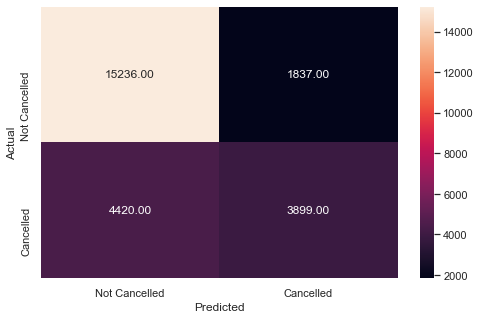

In [69]:
# Checking the performance on the training data
y_pred_train = lg.predict(X_train)
metrics_score(y_train,y_pred_train)

A recall of 47% which is fairly okay but not good enough to validated the efficiency of the model.

Let's check the performance on the test set

              precision    recall  f1-score   support

           0       0.77      0.89      0.83      7317
           1       0.67      0.46      0.54      3566

    accuracy                           0.75     10883
   macro avg       0.72      0.67      0.69     10883
weighted avg       0.74      0.75      0.73     10883



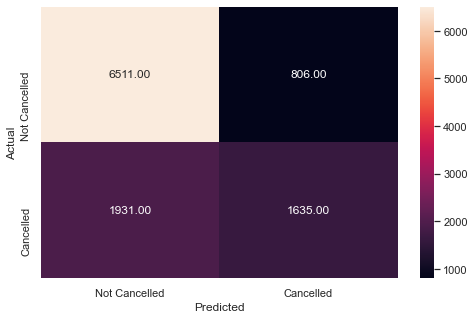

In [70]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test)
metrics_score(y_test,y_pred_test)

Since both precision and recall cannot be maximized in tandem, we go with the f-1 score which is an average of the model performance in recall and precision. Overall the model still maintains a state below adequate efficiency and with this we have to find the optimal threshold for the model.


#### **Question 4.3: Find the optimal threshold for the model using the Precision-Recall Curve. (1 Mark)**

Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.

Let's use the Precision-Recall curve and see if we can find a **better threshold.**


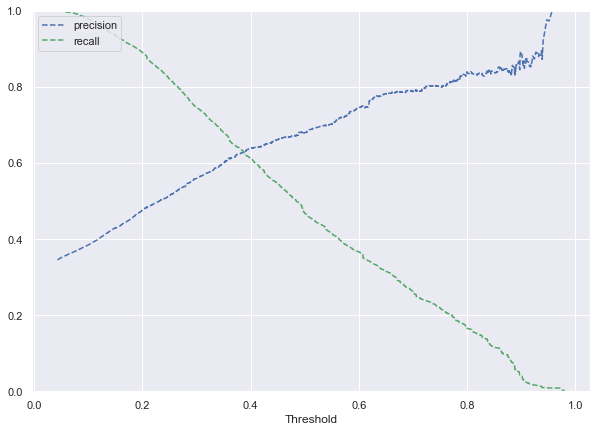

In [71]:
# Predict_proba gives the probability of each observation belonging to each class
y_scores_lg=lg.predict_proba(X_train)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

A threshold of 0.34 is good enough for the model but using the recall curve, the optimal threshold of about 0.36 finds a balance between recall and precision


In [128]:
# Setting the optimal threshold
optimal_threshold = 0.36

#### **Question 4.4: Check the performance of the model on train and test data using the optimal threshold. (2 Marks)**

              precision    recall  f1-score   support

           0       0.83      0.79      0.81     17073
           1       0.61      0.67      0.64      8319

    accuracy                           0.75     25392
   macro avg       0.72      0.73      0.73     25392
weighted avg       0.76      0.75      0.76     25392



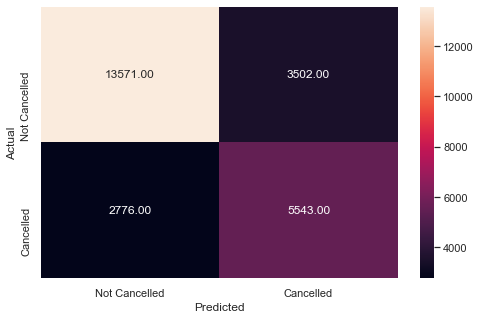

In [129]:
# Creating confusion matrix
y_pred_train = lg.predict_proba(X_train)
metrics_score(y_train,y_pred_train[:,1]>optimal_threshold)

It is observed that the model performance has increased with the input of the optimal threshold, fostering a balance between precision and recall.


Let's check the performance on the test set

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      7317
           1       0.60      0.63      0.62      3566

    accuracy                           0.74     10883
   macro avg       0.71      0.71      0.71     10883
weighted avg       0.75      0.74      0.74     10883



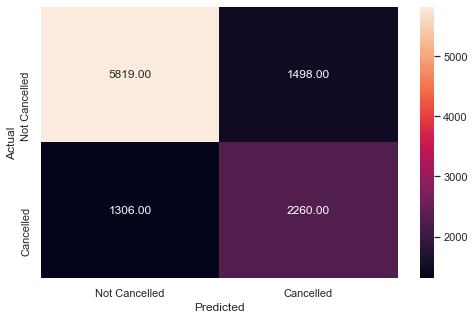

In [74]:
# Checking prformance on test set

y_pred_test = lg.predict_proba(X_test)
metrics_score(y_test,y_pred_test[:,1]>optimal_threshold)

The model tends to do better with the train set than the test set, maybe an effect of the fluctuating and dynamic nature of the dataset.  This favours the notion of going with the f1 sscore due to uncertainty in efficient prediction.
Note: increase in the optimal threshold favours the precision and in the other direction it favours the recall


### **Question 5: Support Vector Machines (11 Marks)**

To accelerate SVM training, let's scale the data for support vector machines.

In [75]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

Let's build the models using the two of the widely used kernel functions:

1.   **Linear Kernel**
2.   **RBF Kernel**



#### **Question 5.1: Build a Support Vector Machine model using a linear kernel (1 Mark)**

**Note: Please use the scaled data for modeling Support Vector Machine**

In [76]:
# linear decision boundary

svm = SVC(kernel="linear",probability=True) 
model = svm.fit(X=X_train_scaled,y=y_train)

#### **Question 5.2: Check the performance of the model on train and test data (2 Marks)**

              precision    recall  f1-score   support

           0       0.78      0.91      0.84     17073
           1       0.71      0.47      0.56      8319

    accuracy                           0.76     25392
   macro avg       0.74      0.69      0.70     25392
weighted avg       0.76      0.76      0.75     25392



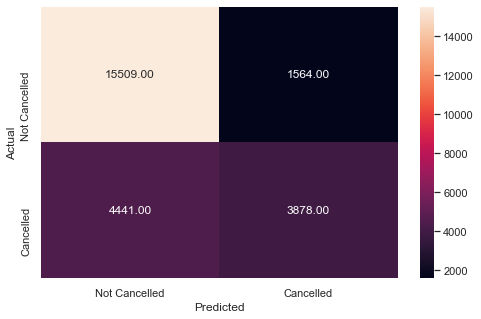

In [77]:
# Checking performance on train set

y_pred_train_svm = model.predict(X_train_scaled)
metrics_score(y_train,y_pred_train_svm)

The model prediction is approximately similar to that without svm.


Checking model performance on test set

              precision    recall  f1-score   support

           0       0.77      0.91      0.83      7317
           1       0.70      0.46      0.55      3566

    accuracy                           0.76     10883
   macro avg       0.74      0.68      0.69     10883
weighted avg       0.75      0.76      0.74     10883



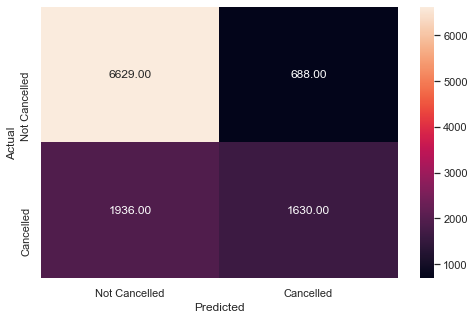

In [102]:
# Checking performance on test set

y_pred_test_svm = model.predict(X_test_scaled)
metrics_score(y_test,y_pred_test_svm)

A model recall of 46% and precision of 70%, this still remains a bit biased in efficiency.


#### **Question 5.3: Find the optimal threshold for the model using the Precision-Recall Curve. (1 Mark)**


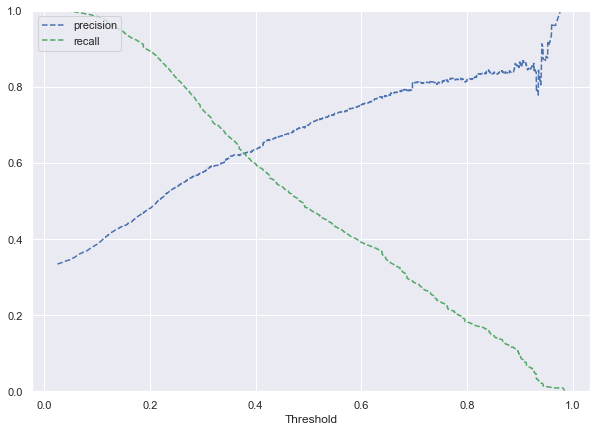

In [79]:
# Predict on train data
y_scores_svm=model.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

A threshold of 0.36, which is a good fit between precision and recall.


In [127]:
optimal_threshold_svm=0.36

#### **Question 5.4: Check the performance of the model on train and test data using the optimal threshold. (2 Marks)**

              precision    recall  f1-score   support

           0       0.82      0.81      0.82     17073
           1       0.62      0.64      0.63      8319

    accuracy                           0.75     25392
   macro avg       0.72      0.72      0.72     25392
weighted avg       0.76      0.75      0.75     25392



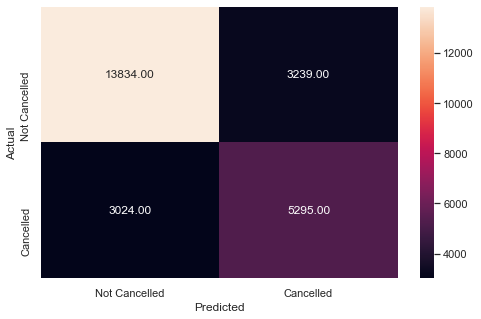

In [126]:
# Checking performance on train set using svm optimal threshold

y_pred_train_svm = model.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train_svm[:,1]>optimal_threshold_svm)

A better f1 score signifying an increase in model precision and recall. Nevertheless, approximately same result with logisitic regression.


              precision    recall  f1-score   support

           0       0.81      0.81      0.81      7317
           1       0.61      0.62      0.62      3566

    accuracy                           0.75     10883
   macro avg       0.71      0.72      0.71     10883
weighted avg       0.75      0.75      0.75     10883



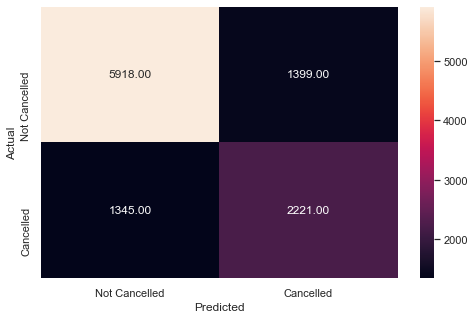

In [107]:
# Checking performsnce on test set using svm optimal threshold

y_pred_test = model.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

With regards to the former, all observations remain equal.


#### **Question 5.5: Build a Support Vector Machines model using an RBF kernel (1 Mark)**

In [83]:
# Building a SVM using "RBF" kernel

svm_rbf=SVC(kernel="rbf",probability=True)
svm_rbf.fit(X_train_scaled, y_train)

model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### **Question 5.6: Check the performance of the model on train and test data (2 Marks)**



              precision    recall  f1-score   support

           0       0.79      0.92      0.85     17073
           1       0.75      0.50      0.60      8319

    accuracy                           0.78     25392
   macro avg       0.77      0.71      0.72     25392
weighted avg       0.78      0.78      0.77     25392



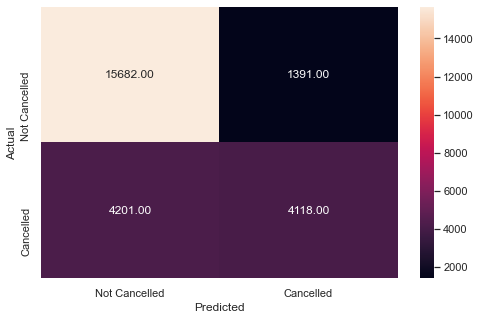

In [84]:
# Checking performsnce on train set

y_pred_train_svm = svm_rbf.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm)

A higheeer value for accuracy but favours precision more the recall.


#### Checking model performance on test set

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      7317
           1       0.75      0.49      0.59      3566

    accuracy                           0.78     10883
   macro avg       0.77      0.70      0.72     10883
weighted avg       0.77      0.78      0.76     10883



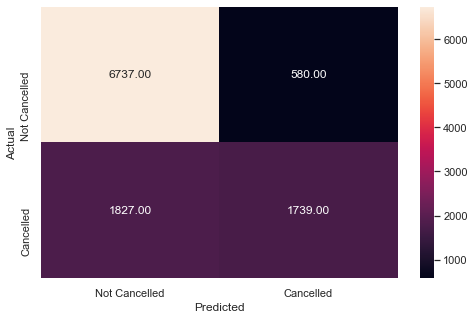

In [85]:
# Checking performsnce on test set

y_pred_test = svm_rbf.predict(X_test_scaled)

metrics_score(y_test, y_pred_test)

 A drop in recall and f1 score but no significant change in precision.


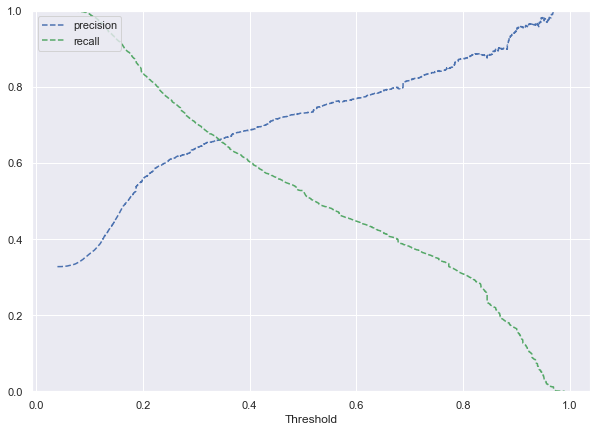

In [86]:
# Predict on train data
y_scores_svm=svm_rbf.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [122]:
optimal_threshold_svm=0.36

#### **Question 5.7: Check the performance of the model on train and test data using the optimal threshold. (2 Marks)**

              precision    recall  f1-score   support

           0       0.82      0.81      0.82     17073
           1       0.62      0.64      0.63      8319

    accuracy                           0.75     25392
   macro avg       0.72      0.72      0.72     25392
weighted avg       0.76      0.75      0.75     25392



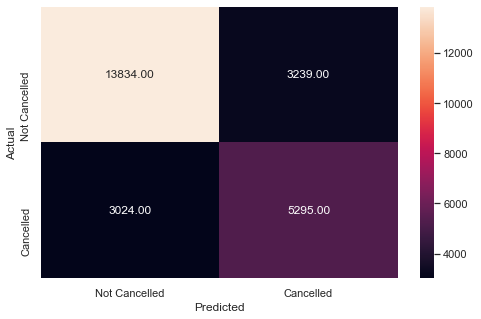

In [121]:
# Checking performance on train set using optimal threshold

y_pred_train_svm = model.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train_svm[:,1]>optimal_threshold_svm)

f1-score being the metric of utmost importance, it is evident there is an increase with regards to that and a better model with inclusion optimal_threshold but remaains similar to the "linear" kernel.


              precision    recall  f1-score   support

           0       0.91      0.55      0.68      7317
           1       0.49      0.89      0.63      3566

    accuracy                           0.66     10883
   macro avg       0.70      0.72      0.66     10883
weighted avg       0.77      0.66      0.67     10883



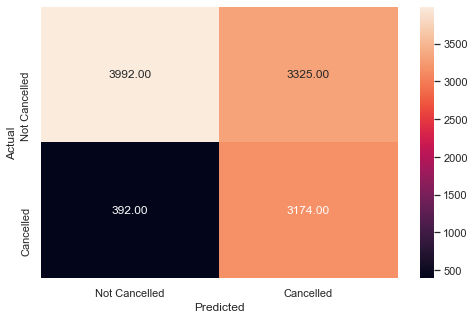

In [89]:
# Checking performance on test set using optimal threshold

y_pred_test = svm_rbf.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

Averagedly the model functions better with the train set.


### **Question 6: Decision Trees (7 Marks)**

#### **Question 6.1: Build a Decision Tree Model (1 Mark)**

In [90]:
# Building a Decision Treee model

model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### **Question 6.2: Check the performance of the model on train and test data (2 Marks)**

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17073
           1       0.98      0.94      0.96      8319

    accuracy                           0.97     25392
   macro avg       0.97      0.96      0.97     25392
weighted avg       0.97      0.97      0.97     25392



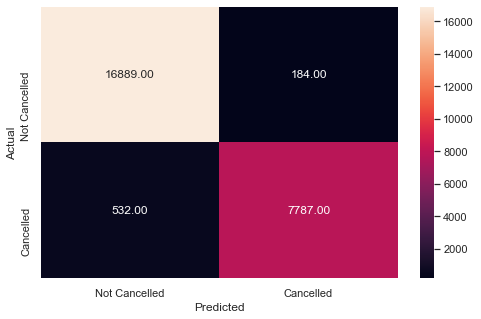

In [91]:
# Checking performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

**Write your answers here:_____**So far this has been the best model when compared to logistic regression and SVM, it has done weell with the training set.


#### Checking model performance on test set

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      7317
           1       0.72      0.71      0.71      3566

    accuracy                           0.81     10883
   macro avg       0.79      0.79      0.79     10883
weighted avg       0.81      0.81      0.81     10883



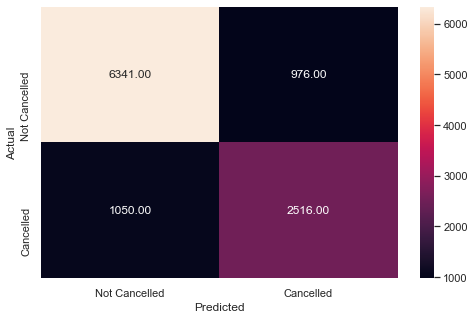

In [92]:
#Checking performance on test set
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

Fairly, it is observed there is a significant reduction in efficiency on the test set. This a case of overfitting.


 #### **Question 6.3: Perform hyperparameter tuning for the decision tree model using GridSearch CV (1 Mark)**

**Note: Please use the following hyperparameters provided for tuning the Decision Tree. In general, you can experiment with various hyperparameters to tune the decision tree, but for this project, we recommend sticking to the parameters provided.**

In [93]:
# Choose the type of classifier.
estimator =  DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}


# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring="recall", n_jobs=-1)
grid_obj = grid_obj.fit(X_train,y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=50, min_samples_split=10,
                       random_state=1)

#### **Question 6.4: Check the performance of the model on the train and test data using the tuned model (2 Mark)**

#### Checking performance on the training set 

              precision    recall  f1-score   support

           0       0.84      0.85      0.85     17073
           1       0.69      0.66      0.67      8319

    accuracy                           0.79     25392
   macro avg       0.76      0.76      0.76     25392
weighted avg       0.79      0.79      0.79     25392



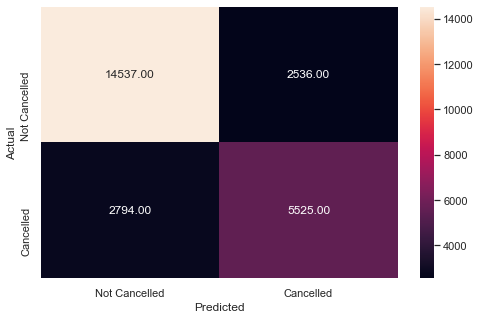

In [94]:
# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

Tuning the model helped to minimize overfitting.


              precision    recall  f1-score   support

           0       0.83      0.85      0.84      7317
           1       0.67      0.65      0.66      3566

    accuracy                           0.78     10883
   macro avg       0.75      0.75      0.75     10883
weighted avg       0.78      0.78      0.78     10883



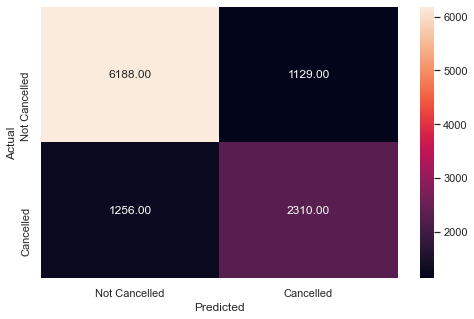

In [95]:
# Checking performance on the training dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

Tuning to minimize overfitting has improved the average performance both on train and test set, making the model unbiaased to either set. Generally, this promotes better predictions but the model functions better on non_cancelled targets.


#### **Visualizing the Decision Tree**

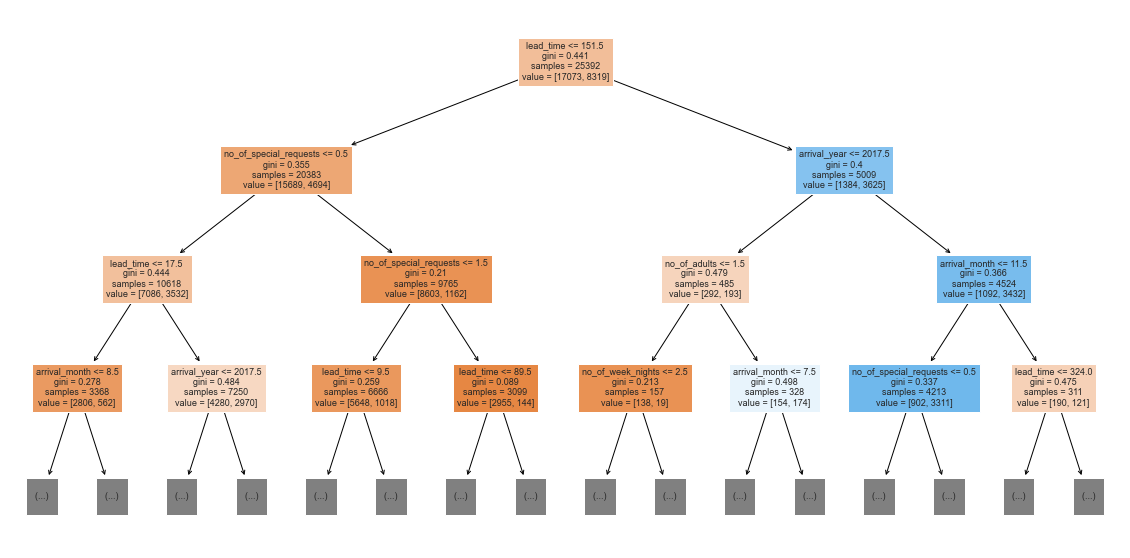

In [96]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,max_depth=3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

#### **Question 6.5: What are some important features based on the tuned decision tree? (1 Mark)**

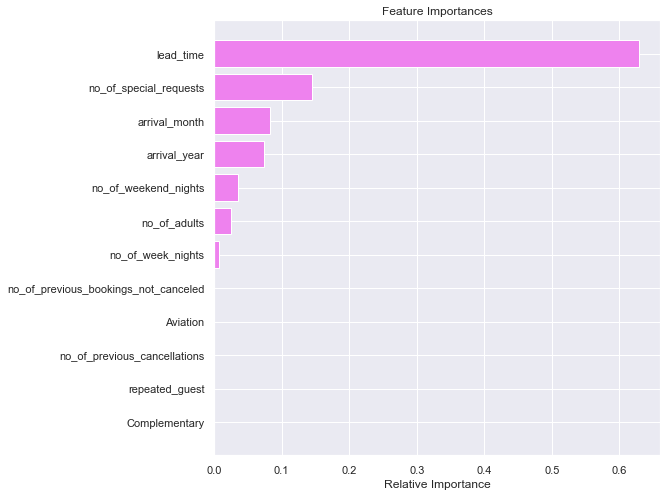

In [97]:
# Importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The tree has been simplified and some important features are lead_time,no_of_special_requests and arrival_month.


___

### **Question 7: Random Forest (4 Marks)**

#### **Question 7.1: Build a Random Forest Model (1 Mark)**

In [130]:
# Building a Random Forest model

rf_estimator = RandomForestClassifier( random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

#### **Question 7.2: Check the performance of the model on the train and test data (2 Marks)**

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     17073
           1       0.97      0.95      0.96      8319

    accuracy                           0.97     25392
   macro avg       0.97      0.97      0.97     25392
weighted avg       0.97      0.97      0.97     25392



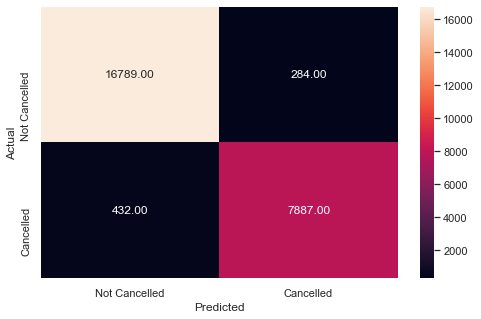

In [131]:
# Checking performance on train set

y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

A very good performance on train set, the model has precision, recall and f1-score efficiencies in range 0.95%-0.98%.


              precision    recall  f1-score   support

           0       0.87      0.89      0.88      7317
           1       0.77      0.72      0.74      3566

    accuracy                           0.84     10883
   macro avg       0.82      0.81      0.81     10883
weighted avg       0.83      0.84      0.83     10883



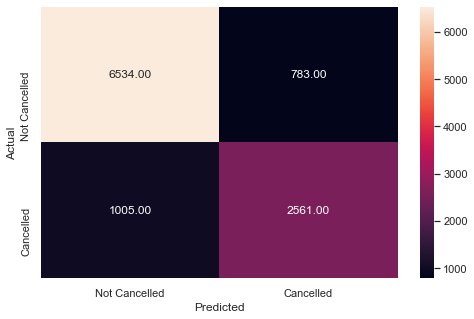

In [132]:
# Checking performance on test set

y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

A drop efficiency on the test set but still fairly okay.


#### **Question 7.3: What are some important features based on the Random Forest? (1 Mark)**

Let's check the feature importance of the Random Forest

<AxesSubplot:title={'center':'Feature Importances'}, xlabel='Importance'>

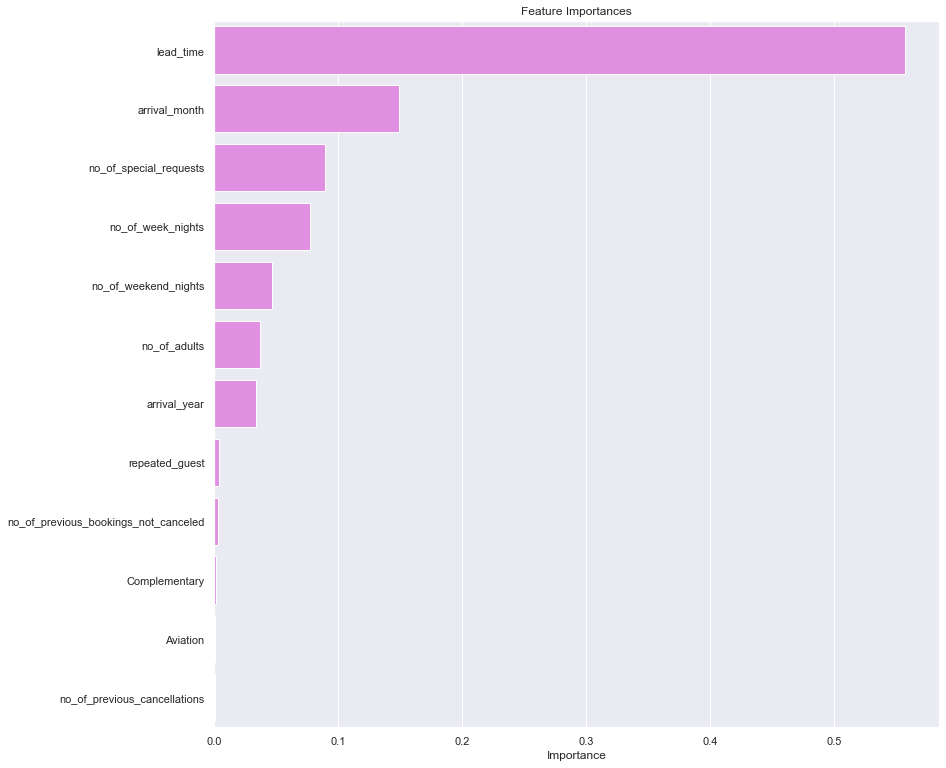

In [133]:
# checking the feature importance of Random Forest

importances = rf_estimator.feature_importances_
columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))
plt.title("Feature Importances")

sns.barplot(importance_df.Importance, importance_df.index, color="violet")



lead_time,arrival_month and no_of_special_requests are some of the most important features of the dataset. 


### **Question 8: Conclude ANY FOUR key takeaways for business recommendations (4 Marks)**

Due to the nature of the dataset and model efficiencies for this business analysis, I would recommend predictions with random forest and desion tree as both models perform best among the four. Also some features have to be nullified as they make the computation lenghty and tend to introdue noise.

If need be for modelling on numeric features, I would suggest linear regression and SVM would be the fit for business predictions. Lastly, it is best to invest more on the most important features but keeping an open mind on other features as the market is a dynamic one.


In [ ]:
#dummy variables of the dataset were created for the modeling but were not used as they did hamper the flow of a minimal moifications, errors and overfitting.

## **Happy Learning!**